<a href="https://colab.research.google.com/github/spacemaninSeoul/justpractice/blob/main/composition_methods_of_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 케라스의 모델 구성 방법

케라스에서 모델을 구성하는 방법에는 세 가지가 존재한다.
 - Sequential()
 - 서브클래싱(Subclassing)
 - 함수형 API

지금까지 계속 사용해왔던 Sequential() 방법은 매우 간단히 사용할 수 있지만, 복잡한 모델을 구성할 수 없다는 단점이 존재한다. 여기서 복잡한 모델이란, 다중 입력과 출력이 존재하는 모델을 의미한다. 예를 들어, 특정 이미지 데이터와 이를 설명할 수 있는 정보를 동시에 입력하는 경우가 있다.

앞으로 다뤄볼 방법들은 이를 가능케 하여 모델을 더욱 유연하게 구성할 수 있게 해준다. 이중에서도 함수형 API는 가장 자주 사용되며, 권장 사항에 해당된다. 이제 세 가지 방법을 사용하여 모델을 구성하고, 구조를 확인해보도록 한다.

## 1) Sequential()로 구성하기

Sequential() 방법은 이미 이전의 여러 장에서 사용했던 방법으로 매우 익숙할 것이다. 이 방법은 단순하고 사용하기 쉬워 접근하기 편리하다. 사용 방법은 여러 번 경험했던 것과 같이 층을 순서대로 쌓는 것이다. 다만 앞에서 언급했듯이 Sequential() 방법은 여러 개의 입력과 출력으로 구성할 수 없으며, 층의 구조를 유연하게 만들지 못한다.

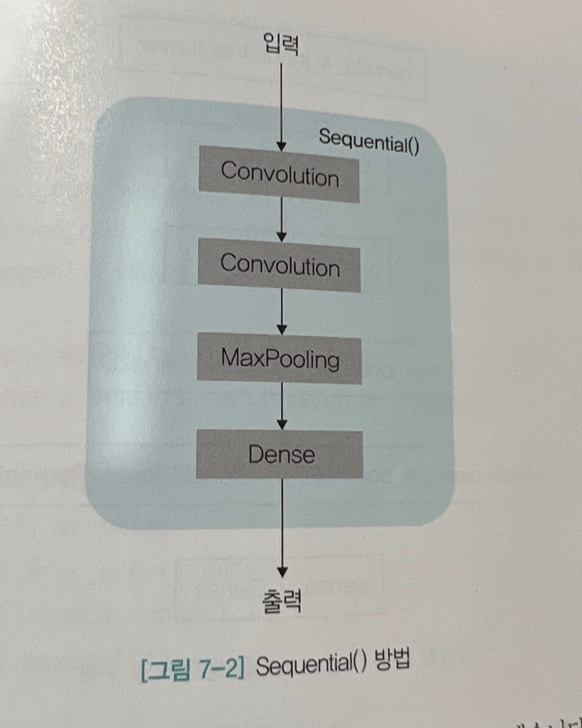

간단한 컨볼루션층으로 이루어진 모델을 구성해보고, 형태를 확인한다.

In [ ]:
# Sequential() 모델 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D

from tensorflow.keras.utils import plot_model

# Sequential()을 통한 모델 구성
model = Sequential()
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(32, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(strides = 2))
model.add(GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 32)               0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 9,601
Trainable params: 9,601
Non-trainabl

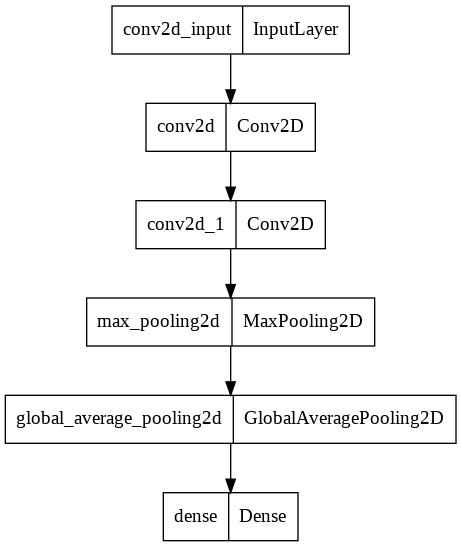

In [ ]:
plot_model(model)

단순하게 층을 차례대로 쌓은 구조를 볼 수 있다. 이와 다르게 서브클래싱과 함수형 API 방법은 모델을 유연하게 구성할 수 있으며, 자신만의 모델 구조를 만들기에 적합한 방법이다.

## 2) 서브클래싱으로 구성하기

서브클래싱 방법은 모델 구성을 커스터마이징(customizing)하기에 최적화된 방법이다. 텐서플로우는 객체 지향에 기반한 파이썬을 사용하므로, 케라스의 Model 클래스를 서브클래싱하여 모델을 구성할 수 있다. 이는 Model 클래스를 상속받는다는 의미이다. Model 클래스를 서브 클래스로 사용하면 fit(), evaluate(), predict() 기능, model.layer을 통한 모델에 포함된 층의 목록 제공, 모델 저장(model.save())와 같은 Model 클래스가 보유하고 있는 기능을 그대로 사용할 수 있다.

하지만 자유롭게 층을 구성할 수 있는 커스터마이징이 장점인 만큼, 모델의 층을 일일이 구성해야 하므로 다른 방법에 비해 작업 시간이 오래 걸리는 것이 단점이다. Sequential() 방법으로 구성해 본 모델을 동일하게 만들어 보도록 한다.

In [ ]:
# 서브클래싱 모델 구성
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D

class MyModel(Model):
  # 사용할 층을 정의한다
  def __init__(self):
    super(MyModel, self).__init__()

    self.first_conv = Conv2D(32, (3, 3), activation = 'relu')
    self.second_conv = Conv2D(32, (3, 3), activation = 'relu')
    self.maxpool = MaxPooling2D(strides = 2)

    self.gap = GlobalAveragePooling2D()
    self.dense = Dense(1, activation = 'sigmoid')

  # 입력 -> 출력의 흐름을 구성한다.
  def call(self, inputs):
    x = self.first_conv(inputs)
    x = self.second_conv(x)
    x = self.maxpool(x)

    x = self.gap(x)
    x = self.dense(X)

    return x

# 모델 객체를 생성한다.
'''
model = MyModel()
model.compile()
model.fit()
'''

'\nmodel = MyModel()\nmodel.compile()\nmodel.fit()\n'

먼저 init 함수에서 사용할 층을 정의한다. 이후 입력에서부터 출력까지의 흐름인 전파(forward-pass)를 위해 call() 함수에서 모델을 구성한다. 생성된 모델 객체는 Model 클래스에서 제공하는 compile() 함수와 fit() 함수를 사용할 수 있다. call() 함수에서 층을 순서대로 구성하는 것을 보아하니 Sequential() 방법에서 모델을 구성할 때와 다르지 않아 보인다. 하지만 서브클래싱 방법은 inputs 인자를 통해 다중 입력으로 구성하거나 call() 함수의 반환값을 다중 출력으로 구성할 수 있다.

서브클래싱을 통한 모델 구성은 자주 사용하지 않는다. 더 쉽고, 편리한 함수형 API를 사용할 수 있기 때문이다. 하지만 특정 모델의 구현 코드를 참조할 때, 서브클래싱 방법을 활용한 구현 코드를 자주 찾아볼 수 있다. 이를 빠르게 해석하기 위해 알아두면 좋다.

## 3) 함수형 API로 구성하기

함수형 API는 모델을 구성하는 세 가지 방법 중 가장 권장하는 방법이다. 함수형 API는 모델을 복잡하고, 유연하게 구성할 수 있으며, 다중 입출력을 다룰 수 있다.

In [2]:
# 함수형 API 모델 구성하기
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.utils import plot_model

# 함수형 API는 Input층을 통해 입력값의 형태를 정의해주어야 한다.
inputs = Input(shape = (224, 224, 3))
x = Conv2D(32, (3, 3), activation = 'relu')(inputs)
x = Conv2D(32, (3, 3), activation = 'relu')(x)
x = MaxPooling2D(strides = 2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(1, activation = 'sigmoid')(x)

# 위에서 정의한 층을 포함하고 있는 모델을 생성한다.

model = Model(inputs = inputs , outputs =x)

함수형 API는 Input 층을 통해 반드시 입력값의 형태를 명시해주어야 한다. 위의 예제에서는 (224, 224, 3) 형태를 입력으로 명시해주었다. 이제 컨볼루션층을 추가하도록 한다. Conv2D(32, ~)(inputs)와 같이 표현하여 이전 층의 출력값과 연결할 수 있다. 함수형 API의 표현은 해당 층이 어떤 층과 연결되어 구성되는지 알기 쉽게 도와준다.

함수형 API를 통해 모델 구성을 끝마쳤다면, Model 클래스를 활용하여 모델을 생성해주어야 한다. 모델을 생성하기 위해 Model 클래스의 inputs와 outputs 인자에 각각 입력값과 출력값을 전달해야 한다. 이제 다음 절에서 함수형 API를 사용하여 우리에게 매우 익숙한 MNIST 데이터셋을 학습시켜 보고, Sequential() 방법이 아닌 함수형 API 방법에 더욱 익숙해지도록 한다.

# 2. 함수형 API 적용


## 1) MNIST에 적용하기


In [18]:
# MNIST 데이터셋 불러오기 및 전처리
from tensorflow.keras.datasets import mnist

# 텐서플로우 저장소에서 데이터를 받는다.
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

In [19]:
from sklearn.model_selection import train_test_split

# 훈련/검증 데이터를 얻기 위해 0.7/0.3 비율로 분리한다.
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=777)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

In [20]:
x_train.shape

(42000, 28, 28)

In [21]:
y_train

array([2, 7, 6, ..., 3, 4, 5], dtype=uint8)

In [22]:
# 모델 입력으로 사용하기 위한 전처리 과정
x_train = (x_train.reshape(-1, 28, 28,1 ))/255
x_val = (x_val.reshape(-1, 28, 28, 1))/255
x_test = (x_test.reshape(-1, 28, 28, 1))/255

from tensorflow.keras.utils import to_categorical

# 각 데이터의 레이블을 범주형 형태로 변경한다.
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [23]:
y_train.shape

(42000, 10)

함수형 API를 사용하여 모델을 구성하고 학습을 진행한다.

In [24]:
# 함수형 API를 활용한 모델 구성 및 학습
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.layers import Input

# 함수형 API는 Input()을 통해 입력값의 형태를 정의해주어야 한다.
inputs = Input(shape = (28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(strides = 2)(x)
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'softmax')(x)

# 위에서 정의한 층을 포함하고 있는 모델을 생성한다
model = Model(inputs = inputs, outputs = x)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.fit(x_train,  y_train, batch_size=32, validation_data=(x_val, y_val), epochs = 10)

Epoch 1/10
1313/1313 [==============================] - 17s 5ms/step - loss: 1.7097 - acc: 0.3691 - val_loss: 1.4480 - val_acc: 0.4962
Epoch 2/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.3067 - acc: 0.5553 - val_loss: 1.1566 - val_acc: 0.6367
Epoch 3/10
1313/1313 [==============================] - 6s 5ms/step - loss: 1.0507 - acc: 0.6630 - val_loss: 0.9485 - val_acc: 0.7052
Epoch 4/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.8667 - acc: 0.7331 - val_loss: 0.8348 - val_acc: 0.7287
Epoch 5/10
1313/1313 [==============================] - 6s 4ms/step - loss: 0.7453 - acc: 0.7722 - val_loss: 0.6923 - val_acc: 0.7953
Epoch 6/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.6542 - acc: 0.8024 - val_loss: 0.6056 - val_acc: 0.8233
Epoch 7/10
1313/1313 [==============================] - 6s 5ms/step - loss: 0.5856 - acc: 0.8207 - val_loss: 0.5662 - val_acc: 0.8274
Epoch 8/10
1313/1313 [==============================] - 6s 5m

모델 구조를 동일하게 사용하여 MNIST 데이터셋을 학습시켜보았다. **함수형 API를 사용하는 경우 Input층을 통해 입력값의 형태를 정의하고, Model 클래스를 통해 모델의 입력값과 출력값을 지정해주어야 한다는 점을 기억해야 한다.** 또한, 계속해서 Flatten층이 아닌 GlobalAveragePooling2D층을 사용했다.

## 2) 다중 입출력 사용하기

이제 Sequential() 방법을 사용한 모델 구성에서 다룰 수 없었던 다중 입출력 예제를 다뤄본다. 다중 입출력의 대표적인 예로 입력한 이미지(동영상)가 어떤 의미를 나타내는지 물어보는 질문과 이미지(동영상)에 대한 설명을 결과로 도출하는 문제가 있다. 이때 모델에 대한 입력으로 이미지(동영상)와 질문을 사용해야 한다.

이번에 탐색해볼 매장에서는 메뉴 보완을 도와줄 자동차 기계를 새로 도입하려고 한다. 매니저는 고객이 각 햄버거 종류에 대해 평가를 남기면(입력), 자동화 기계가 이를 분석하여 햄버거의 평점과 고객이 햄버거에 어떠한 재료가 추가되기를 원하는지에 대한 분석 결과 도출(출력)을 원하고 있다. 이를 수행하기 위해 일정 기간 동안 고객으로부터 여러 햄버거의 평점과 추가를 원하는 재료에 대한 정보를 수집해두었다고 가정하고 이를 레이블로 사용한다. 추가를 원하는 재료는 무조건 한 가지만 적을 것을 고객에게 당부했다고 가정한다.

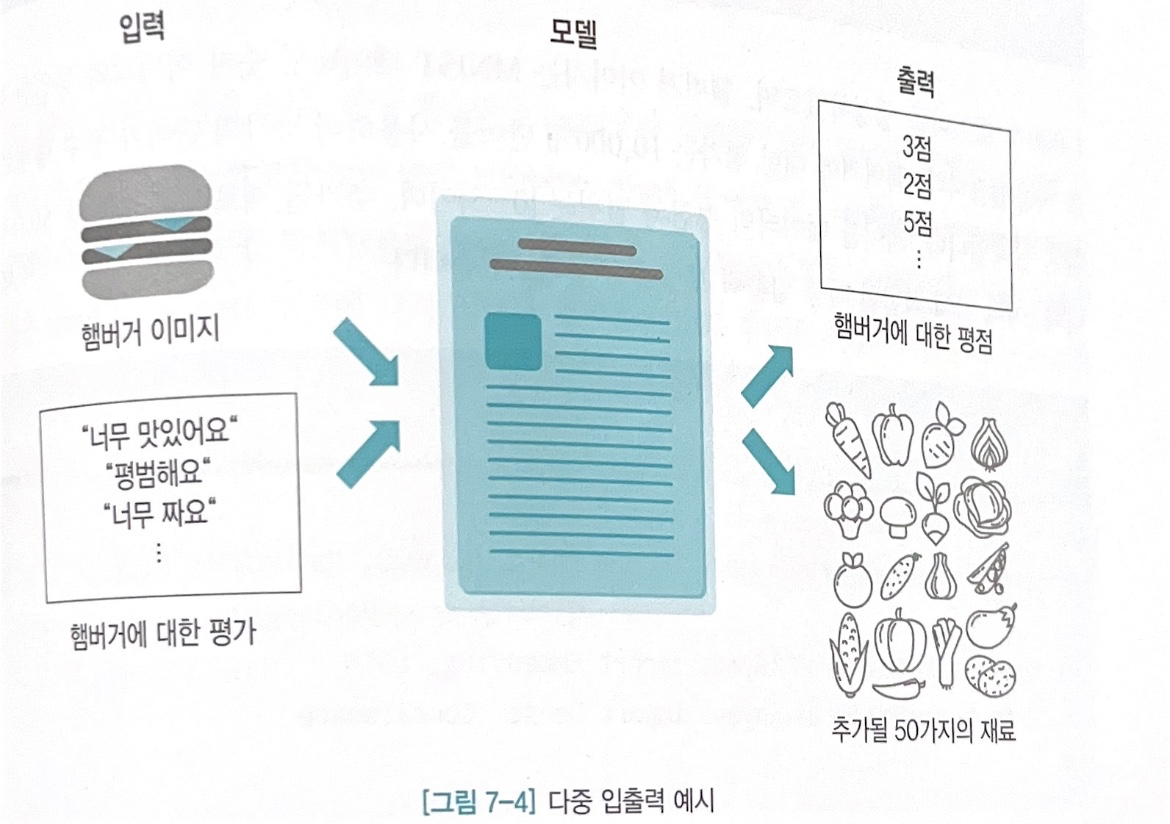

모델은 이미지와 텍스트 형태로 된 평가를 입력으로 받으며, 평점과 추가를 원하는 50가지 재료 중 한 가지를 출력하게 된다.

먼저 Numpy 라이브러리를 이용해 가상 데이터(Dummy data)를 만들어본다.

In [25]:
# 다중 입출력을 위한 데이터 생성
import numpy as np

# 햄버거 이미지
hamburger_img = np.random.random((1000, 28, 28, 1))
# 햄버거에 대한 평가
customer_form = np.random.randint(10000, size = (1000, 100))

# 햄버거에 대한 평점
hamburger_rate = np.round(np.random.random((1000,)) * 5, 1)
# 햄버거에 추가되어질 50가지 재료
update_for_hamburger = np.random.randint(50, size= (1000,))

print(hamburger_img.shape, customer_form.shape)
print(hamburger_rate.shape, update_for_hamburger.shape)

(1000, 28, 28, 1) (1000, 100)
(1000,) (1000,)


1,000개 데이터를 생성했으며, 햄버거 이미지는 MNIST 데이터셋 숫자 이미지와 동일한 형태를 사용했다. 햄버거에 대한 평가는 10,000개의 단어를 사용하여 각각의 단어가 정수 형태로 변환된 상태이다. 레이블 데이터의 평점의 범위는 [0~5]이며, 추가될 재료의 후보는 총 50가지이다. 이제 이에 적합한 다중 입출력 모델을 구성한다.

In [31]:
# 다중 입출력 모델 구성하기
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Embedding, LSTM, Dense, Concatenate
# 각 입력에 대한 형태를 명시한다.
img_input = Input(shape = (28, 28,1), name = 'hamburger_img')
form_input = Input(shape = (None, ), name='customer_form')

# 햄버거 이미지 입력
x_1 = Conv2D(32, (3, 3), activation ='relu')(img_input)
x_1 = Conv2D(32, (3, 3), activation ='relu')(x_1)
x_1 = MaxPooling2D(strides = 2)(x_1)
x_1 = GlobalAveragePooling2D()(x_1)

# 햄버거에 대한 평가 입력
x_2 = Embedding(10000, 64)(form_input)
x_2 = LSTM(128)(x_2)

# 출력을 만들기 위해 모든 입력을 하나의 텐서로 합친다.
x = Concatenate()([x_1, x_2])

# 햄버거 평점에 대한 출력값
rate_pred = Dense(1, name = 'hamburger_rate')(x)

# 보완될 50가지 재료에 대한 출력값
update_pred = Dense(50, activation = 'softmax', name = 'update_for_hamburger')(x)

# 모델을 생성한다.
model = Model(inputs = [img_input, form_input], outputs = [rate_pred, update_pred])

모델이 다중 입력을 가질 경우, 해당 개수만큼 Input층을 정의해주어야 한다.

마지막으로 Model 클래스를 사용하여 모델을 구성할 때, 다중 입출력 모델은 inputs와 outputs 인자에 각각 입력과 출력을 리스트 형태로 전달해주어야 한다.

이제 모델 구조를 그려보도록 한다.

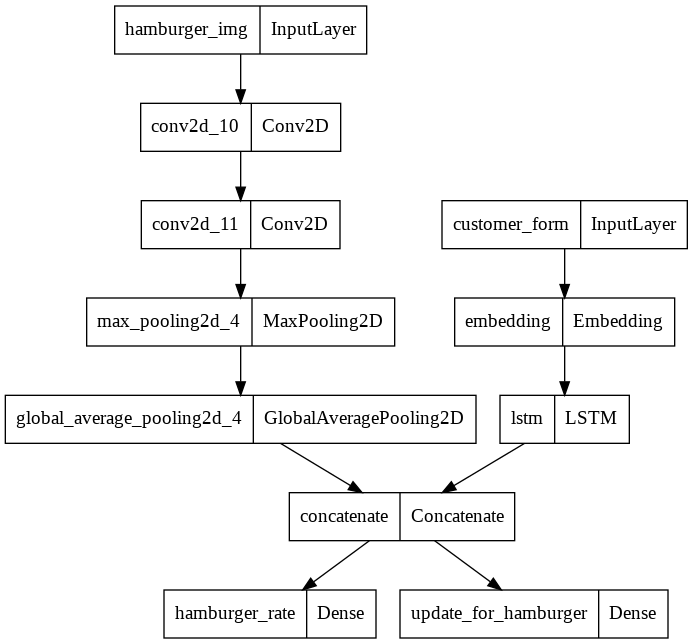

In [32]:
# 모델 구조 그려보기
from tensorflow.keras.utils import plot_model
plot_model(model)

모델 구조를 보면, 입력에 해당하는 두 개의 라인(hamburger_img, customer_form)이 병합되면서, 다시 두 개의 출력(hamburger_rate, update_for_hamburger)으로 나뉘는 것을 볼 수 있다. Concatenate층은 주로 텐서를 병합할 때 사용된다.

model.summary()를 통해 다시 한번 구조를 확인한다.

In [33]:
# 모델 구조 확인
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 hamburger_img (InputLayer)     [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_10 (Conv2D)             (None, 26, 26, 32)   320         ['hamburger_img[0][0]']          
                                                                                                  
 conv2d_11 (Conv2D)             (None, 24, 24, 32)   9248        ['conv2d_10[0][0]']              
                                                                                                  
 customer_form (InputLayer)     [(None, None)]       0           []                               
                                                                                            

plot_model()의 결과보다 보기가 힘들지만 주로 summary() 함수를 사용하니 익숙해질 필요가 있다. summary() 함수가 보여주는 출력 정보를 알아보도록 한다.
 - **Layer** : 층의 이름을 나타낸다. 예제 코드에서 케라스층을 구성할 때, name = hamburger_img와 같이 층의 이름을 입력층과 출력층에 지정해주었다. 입력층의 이름뿐만 아니라 출력 층인 Dense층에 지정한 이름 hamburger_rate와 update_for_hamburger도 출력되는 것을 볼 수 있다. name 인자는 모든 케라스층이 보유하고 있으며, 층의 이름을 지정할 수 있다
 - **Output_shape** : 층의 출력 형태를 나타낸다.
 - **Param #** : 사용되는 파라미터 수를 나타낸다.
 - **Connected to** : 층이 어떤 입력층과 연결되었는지 보여준다.

그럶 이제 학습을 위해 설정을 진행한다.

In [34]:
# 다중 입출력 모델에서 학습 과정 설정하기
# 손실 함수에 리스트 형태를 사용한 경우
model.compile(optimizer = 'adam', loss = ['mse', 'sparse_categorical_crossentropy'], metrics = {'hamburger_rate':'mse', 'update_for_hamburger':'acc'})

# 또는

# 손실 함수에 딕셔너리 형태를 사용한 경우
model.compile(optimizer = 'adam', loss = {'hamburger_rate': 'mse', 'update_for_hamburger' : 'sparse_categorical_crossentropy'}, metrics = {'hamburger_rate':'mse', 'update_for_hamburger':'acc'})

손실 함수는 리스트 형태를 사용하여 각 출력에 적합한 것을 사용하도록 설정했다. 손실 함수에서 첫 번째 출력은 평점이므로 평균 제곱 오차(mean squared error)를 사용한다. 두 번째 출력은 50개의 카테고리 중 하나의 값을 가지며, 원-핫 인코딩이 수행되지 않기에 sparse_categorical_crossentropy를 사용했다.

평가지표는 딕셔너리 형태를 사용하여 각 출력에 적합한 것을 사용하도록 설정했다. 딕셔너리 형태를 사용하지 않고, 리스트 형태로 전달하게 되면 모든 출력에 해당 평가 지표를 적용하기 때문에 원하지 않는 계샨이 발생할 수 있음을 주의해야 한다. 또한, 딕셔너리 형태({key: value})를 사용할 때는 {'층의 이름':'손실 함수'}와 같이 키의 이름과 층의 이름이 동일해야 한다. 여기서 딕셔너리로의 키로 사용한 hamburger_rate, update_for_hamburger는 해당 층의 name 인자에 전달할 이름과 동일한 것으로 볼 수 있다.

이제 학습을 진행하도록 한다.

In [35]:
# 다중 입출력 모델 학습하기
# 모델 학습에 리스트 형태를 사용하는 경우
model.fit([hamburger_img, customer_form], [hamburger_rate, update_for_hamburger], epochs = 2, batch_size = 32)

# 또는

# 모델 학습에 딕셔너리 형태를 사용한 경우
model.fit({'hamburger_img':hamburger_img, 'customer_form':customer_form}, {'hamburger_rate':hamburger_rate, 'update_for_hamburger':update_for_hamburger}, epochs=2, batch_size=32)

Epoch 1/2
32/32 [==============================] - 4s 16ms/step - loss: 8.0761 - hamburger_rate_loss: 4.1418 - update_for_hamburger_loss: 3.9343 - hamburger_rate_mse: 4.1418 - update_for_hamburger_acc: 0.0180
Epoch 2/2
32/32 [==============================] - 0s 11ms/step - loss: 5.7364 - hamburger_rate_loss: 1.8281 - update_for_hamburger_loss: 3.9084 - hamburger_rate_mse: 1.8281 - update_for_hamburger_acc: 0.0280
Epoch 1/2
32/32 [==============================] - 1s 12ms/step - loss: 5.1781 - hamburger_rate_loss: 1.2820 - update_for_hamburger_loss: 3.8961 - hamburger_rate_mse: 1.2820 - update_for_hamburger_acc: 0.0320
Epoch 2/2
32/32 [==============================] - 0s 12ms/step - loss: 4.1601 - hamburger_rate_loss: 0.2609 - update_for_hamburger_loss: 3.8992 - hamburger_rate_mse: 0.2609 - update_for_hamburger_acc: 0.0360


출력 결과에서 성능보다 학습 과정을 유심히 살펴보도록 한다. 각 출력값에 대한 손실 비용과 평가지표를 나타내고 있다.

## 3) 잔차 연결과 인셉션 모듈

함수형 API는 모델 구조를 유연하게 구성할 수 있는 만큼 다양한 모델 구조를 구현하기에 매우 편리하다. 이번에는 많은 모델에서 성능 향상을 위해 사용되고 있는 두 가지 방법을 알아보도록 한다.

### (1) 잔차 연결(Residual block)

잔차 연결은 기존 네트워크에 short-cut 방법을 추가한 것이다.

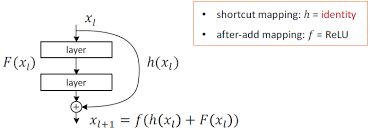

초기 신경망 모델은 높은 성능을 얻기 위해 층을 깊이 쌓는 방법을 선택했다. 하지만 층을 깊이 쌓을수록 학습 오류(Training Error)가 증가하는 문제가 발생했는데, 바로 그래디언트 소실/폭발 문제 때문이다. 잔차 연결은 이를 해결하기 위해 고안되었다. 잔차 연결을 사용하지 않은 모델에서는 층을 깊이 쌓은 경우, 성능이 감소하는 경향을 보여주었지만, 사용한 모델은 성능이 향상하는 것을 논문에서 실험으로 보였다.

잔차 연결은 그림과 같이 몇 개의 케라스층을 거친 입력과 본래의 입력을 연결하여 더해주는 형태를 띠고 있으며, 출력층 이전에 활성화 함수를 거치는 구조이다. 다음 예제 코드는 잔차 연결을 사용한 모델 구성을 보여준다.

In [3]:
# 잔차 연결을 사용하여 모델 구성하기
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Add
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# 잔차 연결을 포함한 네트워크를 구현한다.
def residual_block(inputs, num_channels, use_transform = False):
  x = Conv2D(num_channels, (3, 3), activation = 'relu', padding = 'same')(inputs)
  x = Conv2D(num_channels, (3, 3), padding = 'same')(x)

  # 입력값의 형태가 변환되는 경우
  # 1x1 컨볼루션을 통해 형태를 조절해준다.
  if use_transform:
    x = MaxPooling2D(strides = 2)(x)
    inputs = Conv2D(num_channels, (1, 1), strides = 2, padding = 'same')(inputs)

  # 입력값과 변환된 입력값을 더해준다.
  add_x = Add()([inputs, x])
  
  return Activation('relu')(add_x)

# 쉬운 이해를 위해 MNIST와 동일한 형태로 사용했다.
inputs = Input(shape = (28, 28, 1))
# use_transform은 MaxPooling을 통해 입력값의 크기에 변환을 주겠다는 인자이다.
x = residual_block(inputs, 32, use_transform = True)
x = residual_block(x, 32)
x = residual_block(x, 32, use_transform = True)

# 분류기 부분이다.
x = GlobalAveragePooling2D()(x)
x = Dense(10, activation = 'softmax')(x)

# 모델 구성하기
model = Model(inputs = inputs, outputs = x)

Conv2D층과 MaxPooling2D층으로 이루어진 기본적인 구성은 같다. (다만 ResNet에서 실제로는 최대 풀링층을 사용하지 않지만, 쉬운 이해를 위해 도입하였다. 각 층의 출력값 형태를 줄이고 싶은 경우, 최대 풀링층이 아닌 각 residual_block의 첫 번째 컨볼루션층에서 스트라이드 2를 사용하면 된다) 단, Add층을 통해 입력값과 변환된 입력값을 더해주는 연산이 추가되었다. 또한, 1x1 컨볼루션을 사용하여 입력값의 형태와 몇 개의 케라스층을 거친 형태를 동일하게 하여 연산이 가능하도록 한다. 우리는 지금 함수형 API의 장점인 유연함을 경험하고 있다.

예를 들어, 입력값 형태 (28, 28, 1)와 최대 풀링층을 거친 후의 형태 (14, 14, 32)는 동일하지 않아 Add층이 작동하지 않는다. 이때 스트라이드 2를 가진 1x1 컨볼루션을 사용하여 입력값 형태를 (28, 28, 1) -> (14, 14, 32)로 조절하면 Add층의 연산을 가능하게 할 수 있다. model.summary()를 통해 해당 층의 형태가 어떻게 변화되는지 살펴보도록 하자.

In [4]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_16 (Conv2D)             (None, 28, 28, 32)   320         ['input_3[0][0]']                
                                                                                                  
 conv2d_17 (Conv2D)             (None, 28, 28, 32)   9248        ['conv2d_16[0][0]']              
                                                                                                  
 conv2d_18 (Conv2D)             (None, 14, 14, 32)   64          ['input_3[0][0]']                
                                                                                            

### (2) 인셉션 모듈

인셉션 모듈(Inception Module)은 22개의 층으로 구성된 GoogLeNet(인셉션 V1)에서 처음으로 사용되었다.

인셉션 모듈의 구조는 다음과 같다. 인셉션 모듈은 여러 가지 필터 크기를 사용하여 데이터의 다양한 특징을 담아낼 수 있다. 이와 동시에 1x1 컨볼루션을 사용하여 차원 감소와 효과적인 다운샘플링을 통해 전체적인 자원 감소의 목적이 있다. 인셉션 모듈의 구조는 다음과 같다.

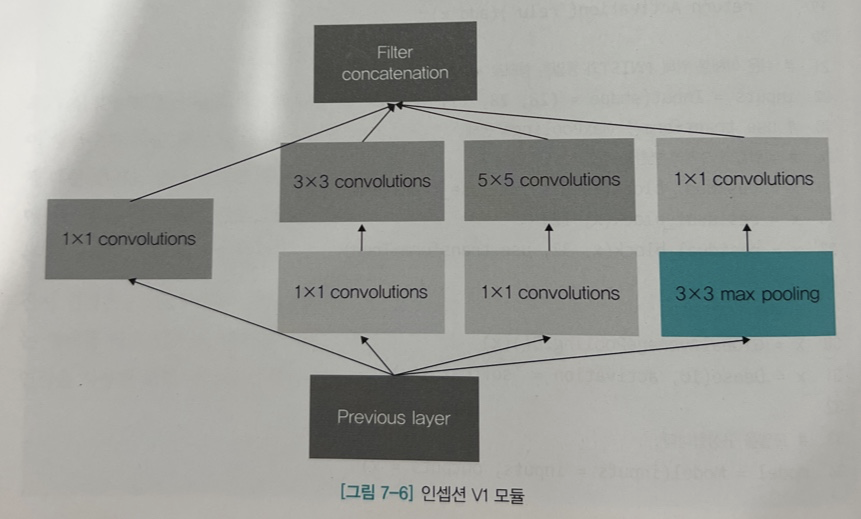

입력층(Previous Layer)에서 다양한 필터 크기의 컨볼루션층으로 구성된 여러 개의 가지(branch)를 거치고, 각 가지의 출력을 병합한 출력(Filter Concatenation)으로 만들어내는 것을 볼 수 있다. 우리가 구현할 인셉션 모듈은 네 개의 가지로 구성되어 있다. 다음 목록에서 x_num은 위 그림의 왼쪽부터 시작하는 케라스층을 나타낸다.

 - x_1 : 1x1 컨볼루션
 - x_2 : 1x1 컨볼루션 + 3x3 컨볼루션
 - x_3 : 1x1 컨볼루션 + 5x5 컨볼루션
 - x_4 : 3x3 최대 풀링 + 1x1 컨볼루션

잔차 연결에서 경험했듯이, 함수형 API를 사용하면 이같은 형태를 매우 쉽게 구현할 수 있다. 

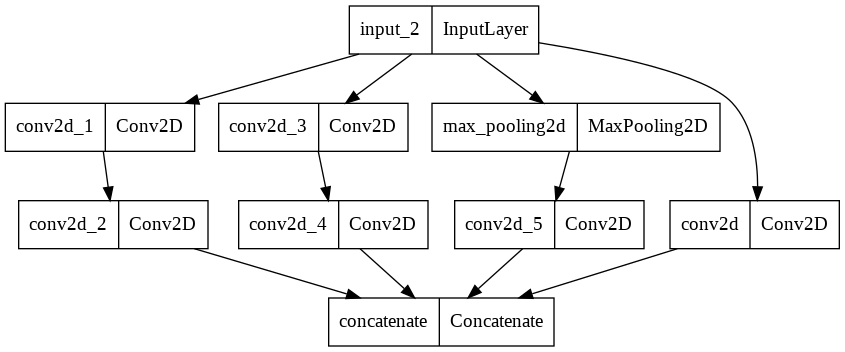

In [2]:
# 인셉션 모듈을 사용하여 모델 구성하기
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Concatenate
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def inception_module(x):
  x_1 = Conv2D(32, (1, 1), activation = 'relu')(x)
  
  x_2 = Conv2D(48, (1, 1), activation = 'relu')(x)
  x_2 = Conv2D(64, (3, 3), activation = 'relu', padding = 'same')(x_2)

  x_3 = Conv2D(16, (1, 1), activation = 'relu')(x)
  x_3 = Conv2D(16, (5, 5), activation = 'relu', padding = 'same')(x_3)

  x_4 = MaxPooling2D(pool_size = (3, 3), strides = 1, padding = 'same')(x)
  x_4 = Conv2D(32, (1, 1), activation = 'relu')(x_4)

  output = Concatenate()([x_1, x_2, x_3, x_4])

  return output

inputs = Input(shape = (224, 224, 3))
x = inception_module(inputs)

model = Model(inputs = inputs, outputs = x)

from tensorflow.keras.utils import plot_model
plot_model(model)

직접 모델을 그려보니 인셉션 모듈과 동일한 형태를 얻었다. 잔차 연결과 다르게 이번 구조에서는 Concatenate층을 사용했다. 많은 모델 구조에서 1x1 컨볼루션으로 다양한 연산을 진행한 뒤, Concatenate층을 사용하여 채널 단위로 합쳐주는 방법을 자주 볼 수 있을 것이다. 인셉션 계열은 구글 팀의 성능 및 자원 사용에 관한 다양한 고민이 담겨 있다. 그렇기에 단계별로 각 버전에 어떠한 방법이 사용되었는지 살펴본다면 아주 흥미로울 것이다.

## 4) 전이 학습 사용하기

잔차 연결이 사용된 ResNet과 인셉션 모듈이 포함된 인셉션 계열의 모델을 전부 구현할필요는 없다. **하지만 어떠한 모델이든 해당 모델에서 사용된 핵심 구조는 직접 구현해보는 것이 좋다.**

케라스에서는 ImageNet 데이터셋으로 학습된 여러 가지 모델을 제공하고 있다. 위에서 살펴본 잔차 연결과 인셉션 모듈이 포함된 ResNet과 Inception 모델이 tensorflow.keras.application를 통해 제공되고 있다. 아마도 직접 구현한 모델을 처음부터 학습시키는 방법보다 전이 학습을 더 자주 사용하게 될지 모르기에 살펴보도록 한다.

세 가지 인자의 설명은 다음과 같다.
 - weights : ImageNet 데이터를 학습시킨 가중치의 사용 여부를 결정한다. 기본값은 None이며, 가중치를 사용하고 싶다면 'imagenet'을 전달해야 한다.
 - input_shape : 입력 데이터의 형태를 전달한다.
 - include_top : 모델의 분류기층을 포함해서 구성할지를 결정한다. False를 전달할 경우, 위의 코드처럼 데이터셋에 적합한 분류기를 직접 정의해주어야 한다.

In [5]:
# ResNet을 활용하여 모델 구성
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def get_model(num_classes):
  # ImageNet으로 학습된 모델을 불러온다.
  # inception_v3 = InceptionV3(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))
  resnet = ResNet50(weights = 'imagenet', include_top = False, input_shape = (32, 32, 3))

  # 불러온 모델의 마지막 출력층과 연결한다.
  x = GlobalAveragePooling2D()(resnet.output)
  x = Dense(num_classes, activation = 'softmax')(x)

  # 모델을 생성한다.
  model = Model(inputs = resnet.input, outputs = x)

  return model

model = get_model(num_classes = 10)
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

# 모델 구조를 확인해보자
model.summary()

94781440/94765736 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                           

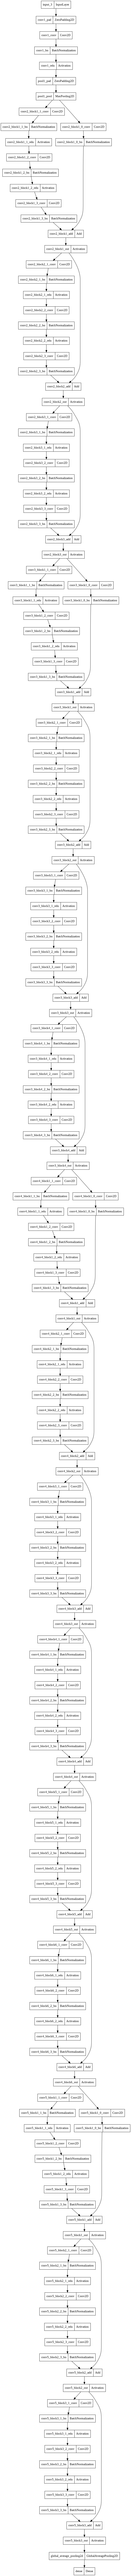

In [6]:
plot_model(model)


resnet.input과 resnet.output은 ResNet 모델의 입력층과 출력층을 반환한다. 이를 활용하여 분류기에 해당하는 Dense층과 연결하고, Model 클래스를 사용하여 전체 모델을 구성했다.

# 5) 텐서플로우 허브 사용하기

먼저, 텐서플로우 허브에 접속해 적절한 모델을 찾아보아야 한다. 여기서 만나볼 예제는 Image Classification 목록에 포함되어 있는 EfficientNet B0 모델을 사용한다.

In [7]:
# 텐서플로우 허브가 설치되어있지 않다면 다음 명령어를 통해 설치한다.
# pip install tensorflow_hub

SyntaxError: ignored

텐서플로우 허브를 통해 불러올 EfficientNet B0 모델은 ImageNet 데이터셋으로 사전 학습이 되어 있다. 우리는 사전 학습된 모델의 가중치를 사용하고, 분류기 부분만 CIFAR-10 데이터셋으로 미세 조정을 수행할 것이다.

In [8]:
# CIFAR-10 데이터셋 불러오기
from tensorflow.keras.datasets import cifar10
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


In [12]:
x_train[:1]

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [15]:
y_train.shape

(50000, 1)

In [16]:
# 평균과 표준편차는 채널별로 구한다.
x_mean = np.mean(x_train, axis = (0 , 1, 2))
x_std = np.std(x_train, axis = (0 , 1, 2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

img_shape = x_train.shape[1:]
print(img_shape)

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000
(32, 32, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


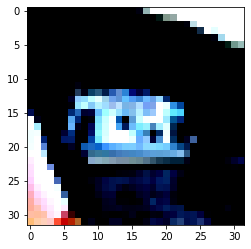

In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[3])

url을 통해 텐서플로우 허브에서 제공하는 모델을 불러올 수 있다. 모델별 url은 텐서플로우 허브에 존재하는 해당 모델의 페이지에서 확인할 수 잇다. Efficient B0(Image Classification) 모델 페이지에서 url을 확인하고, 이를 사용하도록 한다.

https://tfhub.dev/google/efficientnet/b0/classification/1
을 참고

In [23]:
import tensorflow as tf
import tensorflow_hub as hub

model_url = 'https://tfhub.dev/google/efficientnet/b0/classification/1'
hub_layer = hub.KerasLayer(model_url, trainable=False)

KerasLayer 클래스가 url을 통해 사전 학습된 가중치와 함께 모델을 불러오고, trainable 인자를 통해 학습 여부를 지정할 수 있다. 우리는 분류기 부분만을 학습할 것이기에 False 값을 전달한다. 텐서플로우 허브를 통해 불러온 모델을 사용하여 전체 모델을 구성해본다.

In [24]:
# 전체 모델 구성하기
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
model = Sequential([hub_layer, Dense(10, activation = 'softmax')])

model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['acc'], optimizer = 'adam')

model.build((None,) + img_shape)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1000)              5330564   
                                                                 
 dense_1 (Dense)             (None, 10)                10010     
                                                                 
Total params: 5,340,574
Trainable params: 10,010
Non-trainable params: 5,330,564
_________________________________________________________________


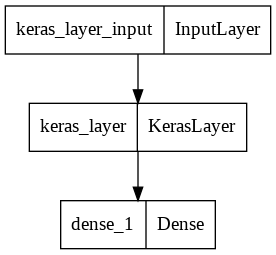

In [25]:
plot_model(model)

이전과 다른 점은 build() 함수를 통해 배치 크기(None) 및 입력 이미지 크기(img_shape)를 수동으로 지정해주어 모델을 구성하는 점이다. 이제 학습을 진행하는 과정만이 남아있다.

In [26]:
# 모델 학습
model.fit(x_train, y_train, epochs=1, batch_size = 32, validation_data = (x_val, y_val))

1094/1094 [==============================] - 29s 15ms/step - loss: 2.2720 - acc: 0.2039 - val_loss: 2.1961 - val_acc: 0.2179


지금까지 계속해서 다루었던 케라스 개발 과정에서 텐서플로우 허브를 통해 모델을 불러오는 몇 개의 코드만 추가되었을 뿐이다. 다양한 문제를 다루는 예제를 보고 싶다면, 텐서플로우 허브 깃허브 저장소(https://github.com/tensorflow/hub)를 참고하면 좋다.